# 導入數據

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
# import dataset
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')

X_test = pd.read_csv('./data/nba/X_test.csv')
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)
print(X_train[:4])
print(y_train[:4])



(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


# 選取特徵值

 1) SHOT_DIST                      0.708266
 2) CLOSE_DEF_DIST                 0.234857
 3) TOUCH_TIME                     0.032164
 4) SHOT_CLOCK                     0.024714
 5) PTS_TYPE                       0.000000
 6) DRIBBLES                       0.000000
 7) GAME_CLOCK                     0.000000
 8) PERIOD                         0.000000


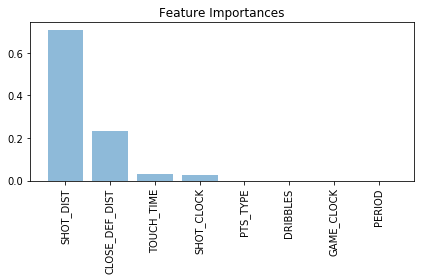

In [9]:
forest = DecisionTreeClassifier(criterion='entropy', 
                                max_depth=3, 
                                random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_train.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X_train.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()


X_train = X_train[['SHOT_DIST' , 'CLOSE_DEF_DIST','TOUCH_TIME']]
# fit the model
X_test =  X_test[['SHOT_DIST' , 'CLOSE_DEF_DIST','TOUCH_TIME']]

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 選取model,實驗發現DecisionTree有最好的效果

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=0)



clf = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4, 
                              random_state=0)


clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test , y_pred)

print("accuracy of Decision tree = %f" % accuracy)

accuracy of Decision tree = 0.618321


# 畫出Learning Curve

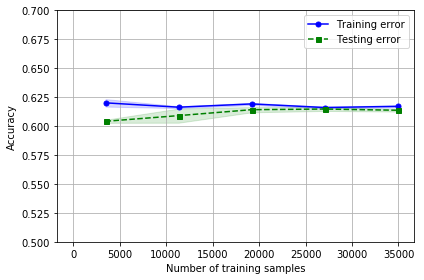

In [35]:
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')
from sklearn.learning_curve import learning_curve
y_train = y_train.values

y_train = y_train.reshape(52399 , )

train_sizes, train_scores, test_scores = learning_curve(clf , X_train, y_train,  scoring= 'accuracy')


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='Training error')
plt.fill_between(train_sizes,
        train_mean+train_std,
        train_mean-train_std,
        alpha=0.15, color='blue')
    
plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Testing error')
plt.fill_between(train_sizes,
        test_mean+test_std,
        test_mean-test_std,
        alpha=0.15, color='green')
    
plt.hlines(y=1, xmin=0, xmax=80, color='red', linewidth=2, linestyle='--')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.5, 0.7])
plt.tight_layout()
plt.show()

# 其餘模型結果

(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 1) GAME_CLOCK                     0.203219
 2) SHOT_DIST                      0.199475
 3) SHOT_CLOCK                     0.179909
 4) CLOSE_DEF_DIST                 0.170689
 5) TOUCH_TIME                     0.140588
 6) PERIOD                         0.051054
 7) DRIBBLES                       0.047976
 8) PTS_TYPE                       0.007091


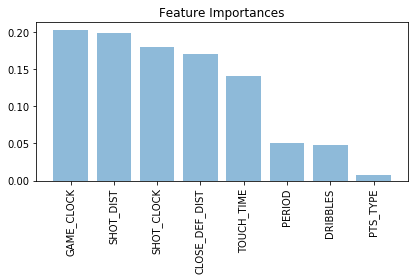

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


accuracy of RandomForest = 0.561679


In [44]:
#RandomForest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# import dataset
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')

X_test = pd.read_csv('./data/nba/X_test.csv')
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)
print(X_train[:4])
print(y_train[:4])

forest =  RandomForestClassifier(criterion='entropy',
                                 n_estimators=200, 
                                 random_state=1,
                                 n_jobs=2)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_train.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X_train.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()


X_train = X_train[['GAME_CLOCK' , 'SHOT_DIST','SHOT_CLOCK']]



sc = StandardScaler()

X_train = sc.fit_transform(X_train)




X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=0)



clf =RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)

clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test , y_pred)

print("accuracy of RandomForest = %f" % accuracy)



In [4]:
#SVM+PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# import dataset
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')

X_test = pd.read_csv('./data/nba/X_test.csv')
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)
print(X_train[:4])
print(y_train[:4])






sc = StandardScaler()

X_train = sc.fit_transform(X_train)

pca=PCA(n_components=3)
X_train = pca.fit_transform(X_train)


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=0)



clf =SVC()

clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test , y_pred)

print("accuracy of SVM = %f" % accuracy)


(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of SVM = 0.597634
